<a href="https://colab.research.google.com/github/rachocr/CCDEPLRL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [40]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [42]:
dataset.head(20)

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5
5,ang gnda nang short nagustohan nang binigyan k...,4
6,maganda sya medyo manipis nga lang ..,4
7,,4
8,,4
9,"manipis pla at ska dami himulmol ng sinulid, d...",2


## 1. Tokenize the data

In [43]:
dataset['sentiment'] = dataset['rating'].apply(lambda rating : 1 if rating > 3 else 0)
sentences = dataset['review'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [66]:

vocab_size = 3000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = ""

In [67]:
# answer here

# Import the Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type,
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

## 2. Sequence the data

## 3. Pad the data

In [68]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [69]:


# Specify a max length for the padded sequences
padded = pad_sequences(sequences, maxlen=15)
print(padded)

[[   0    0    0 ... 1514  390   66]
 [   0    0    0 ...   89  603 1516]
 [  24    3  100 ...    9  168   38]
 ...
 [ 431   20    1 ...  218  654   75]
 [   0    0    0 ...  159   38  444]
 [  35 1438    5 ...   87  464   12]]


## 4. Train a sentiment model

In [70]:
# answer here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  # Use Global Average Pooling
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
num_epochs = 30
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9844 - loss: 0.0376 - val_accuracy: 0.7960 - val_loss: 0.4881
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9837 - loss: 0.0373 - val_accuracy: 0.4876 - val_loss: 0.7476
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0349 - val_accuracy: 0.8109 - val_loss: 0.4630
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.6318 - val_loss: 0.6234
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9943 - loss: 0.0272 - val_accuracy: 0.8060 - val_loss: 0.4349
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9935 - loss: 0.0277 - val_accuracy: 0.5124 - val_loss: 0.7058
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9694 - loss: 0.0434 - val_accuracy: 0.6866 - val_loss: 0.5655
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.7960 - val_loss:

## Get files for visualing the network

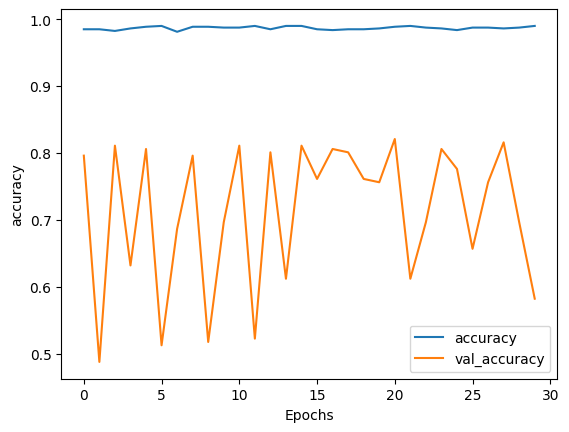

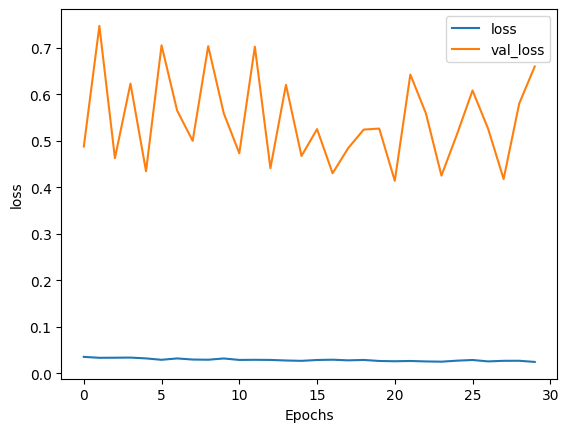

In [84]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [85]:
import io

# Assuming weights are already defined from the embedding layer
embedding_layer = model.get_layer('embedding_4')  # Use the correct layer name here
weights = embedding_layer.get_weights()[0]

# Create reverse index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write metadata and vectors
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index.get(word_num, None)  # Safe lookup
    if word is None:  # If word_num is not found in reverse_word_index
        print(f"Warning: No word found for index {word_num}")
        continue  # Skip this iteration if the word doesn't exist
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()


In [86]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [87]:
fake_reviews = ['super worth it ang ganda nito',
                'ang gago ng quality nito',
                'sakto lang']

print(fake_reviews)

# Create the sequences
padding_type = 'post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

# Predict sentiment
classes = model.predict(fakes_padded)

# Display each review with a human-readable sentiment
for i in range(len(fake_reviews)):
    # Using a threshold of 0.5 to decide sentiment (Sigmoid output between 0 and 1)
    sentiment = "Positive" if classes[i] >= 0.5 else "Negative"
    print(fake_reviews[i])
    print(f"Score: {classes[i][0]:.4f}")
    print('\n')

['super worth it ang ganda nito', 'ang gago ng quality nito', 'sakto lang']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
super worth it ang ganda nito
Score: 0.9022


ang gago ng quality nito
Score: 0.6553


sakto lang
Score: 0.5822


